In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings('ignore')
import getpass  # To get the password without showing the input
from sqlalchemy import create_engine
password = getpass.getpass()

 ··············


In [2]:
#---------------------------------INFO---------------------------------------------------------------------------------------------------------------------------
#Top 100 Spotify Songs 

In [3]:
data = pd.read_csv("spotify_dataset.csv")
print("Data Dimensions are: ", data.shape)
print("Columns: ", data.columns)

Data Dimensions are:  (1556, 23)
Columns:  Index(['Index', 'Highest Charting Position', 'Number of Times Charted',
       'Week of Highest Charting', 'Song Name', 'Streams', 'Artist',
       'Artist Followers', 'Song ID', 'Genre', 'Release Date', 'Weeks Charted',
       'Popularity', 'Danceability', 'Energy', 'Loudness', 'Speechiness',
       'Acousticness', 'Liveness', 'Tempo', 'Duration (ms)', 'Valence',
       'Chord'],
      dtype='object')


In [4]:
data.isnull().sum()/len(data)

Index                        0.0
Highest Charting Position    0.0
Number of Times Charted      0.0
Week of Highest Charting     0.0
Song Name                    0.0
Streams                      0.0
Artist                       0.0
Artist Followers             0.0
Song ID                      0.0
Genre                        0.0
Release Date                 0.0
Weeks Charted                0.0
Popularity                   0.0
Danceability                 0.0
Energy                       0.0
Loudness                     0.0
Speechiness                  0.0
Acousticness                 0.0
Liveness                     0.0
Tempo                        0.0
Duration (ms)                0.0
Valence                      0.0
Chord                        0.0
dtype: float64

In [5]:
data.head()

,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,...,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
0,1,1,8,2021-07-23--2021-07-30,Beggin',"48,633,449",Måneskin,3377762,3Wrjm47oTz2sjIgck11l5e,"['indie rock italiano', 'italian pop']",...,0.714,0.8,-4.808,0.0504,0.127,0.359,134.002,211560,0.589,B
1,2,2,3,2021-07-23--2021-07-30,STAY (with Justin Bieber),"47,248,719",The Kid LAROI,2230022,5HCyWlXZPP0y6Gqq8TgA20,['australian hip hop'],...,0.591,0.764,-5.484,0.0483,0.0383,0.103,169.928,141806,0.478,C#/Db
2,3,1,11,2021-06-25--2021-07-02,good 4 u,"40,162,559",Olivia Rodrigo,6266514,4ZtFanR9U6ndgddUvNcjcG,['pop'],...,0.563,0.664,-5.044,0.154,0.335,0.0849,166.928,178147,0.688,A
3,4,3,5,2021-07-02--2021-07-09,Bad Habits,"37,799,456",Ed Sheeran,83293380,6PQ88X9TkUIAUIZJHW2upE,"['pop', 'uk pop']",...,0.808,0.897,-3.712,0.0348,0.0469,0.364,126.026,231041,0.591,B
4,5,5,1,2021-07-23--2021-07-30,INDUSTRY BABY (feat. Jack Harlow),"33,948,454",Lil Nas X,5473565,27NovPIUIRrOZoCHxABJwK,"['lgbtq+ hip hop', 'pop rap']",...,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000,0.894,D#/Eb


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Index                      1556 non-null   int64 
 1   Highest Charting Position  1556 non-null   int64 
 2   Number of Times Charted    1556 non-null   int64 
 3   Week of Highest Charting   1556 non-null   object
 4   Song Name                  1556 non-null   object
 5   Streams                    1556 non-null   object
 6   Artist                     1556 non-null   object
 7   Artist Followers           1556 non-null   object
 8   Song ID                    1556 non-null   object
 9   Genre                      1556 non-null   object
 10  Release Date               1556 non-null   object
 11  Weeks Charted              1556 non-null   object
 12  Popularity                 1556 non-null   object
 13  Danceability               1556 non-null   object
 14  Energy  

In [7]:
#lowercase
data.columns = data.columns.str.lower()

In [8]:
data.duplicated().sum()

0

In [9]:
data.columns

Index(['index', 'highest charting position', 'number of times charted',
       'week of highest charting', 'song name', 'streams', 'artist',
       'artist followers', 'song id', 'genre', 'release date', 'weeks charted',
       'popularity', 'danceability', 'energy', 'loudness', 'speechiness',
       'acousticness', 'liveness', 'tempo', 'duration (ms)', 'valence',
       'chord'],
      dtype='object')

In [10]:
filtered_data = data[['index', 'highest charting position', 'number of times charted', 'song name', 'streams', 'artist',
       'artist followers', 'genre', 'release date', 'weeks charted','danceability', 'energy', 'loudness', 'speechiness',
       'acousticness', 'liveness', 'tempo', 'valence',
       'chord','popularity']]

In [11]:
filtered_data.head()

,index,highest charting position,number of times charted,song name,streams,artist,artist followers,genre,release date,weeks charted,danceability,energy,loudness,speechiness,acousticness,liveness,tempo,valence,chord,popularity
0,1,1,8,Beggin',"48,633,449",Måneskin,3377762,"['indie rock italiano', 'italian pop']",2017-12-08,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,0.714,0.8,-4.808,0.0504,0.127,0.359,134.002,0.589,B,100
1,2,2,3,STAY (with Justin Bieber),"47,248,719",The Kid LAROI,2230022,['australian hip hop'],2021-07-09,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,0.591,0.764,-5.484,0.0483,0.0383,0.103,169.928,0.478,C#/Db,99
2,3,1,11,good 4 u,"40,162,559",Olivia Rodrigo,6266514,['pop'],2021-05-21,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,0.563,0.664,-5.044,0.154,0.335,0.0849,166.928,0.688,A,99
3,4,3,5,Bad Habits,"37,799,456",Ed Sheeran,83293380,"['pop', 'uk pop']",2021-06-25,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,0.808,0.897,-3.712,0.0348,0.0469,0.364,126.026,0.591,B,98
4,5,5,1,INDUSTRY BABY (feat. Jack Harlow),"33,948,454",Lil Nas X,5473565,"['lgbtq+ hip hop', 'pop rap']",2021-07-23,2021-07-23--2021-07-30,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,0.894,D#/Eb,96


In [12]:
filtered_data.shape

(1556, 20)

In [13]:
#filtered_data['week of highest charting'] = pd.to_datetime(filtered_data['week of highest charting'], errors ='coerce')
filtered_data['release date'] = pd.to_datetime(filtered_data['release date'], errors ='coerce')


In [14]:

filtered_data['energy'] = pd.to_numeric(filtered_data['energy'],errors = 'coerce')
filtered_data['popularity'] = pd.to_numeric(filtered_data['popularity'],errors = 'coerce')
filtered_data['artist followers'] = pd.to_numeric(filtered_data['artist followers'],errors = 'coerce')
filtered_data['danceability'] = pd.to_numeric(filtered_data['danceability'],errors = 'coerce')
filtered_data['danceability'] = pd.to_numeric(filtered_data['danceability'],errors = 'coerce')
filtered_data['valence'] = pd.to_numeric(filtered_data['valence'],errors = 'coerce')
#filtered_data['loudness'] = pd.to_numeric(filtered_data['loudness'],errors = 'coerce')
filtered_data['liveness'] = pd.to_numeric(filtered_data['liveness'],errors = 'coerce')
filtered_data['acousticness'] = pd.to_numeric(filtered_data['acousticness'],errors = 'coerce')
filtered_data['tempo'] = pd.to_numeric(filtered_data['tempo'],errors = 'coerce')
#filtered_data['duration (ms)'] = pd.to_numeric(filtered_data['duration (ms)'],errors = 'coerce')
filtered_data['speechiness'] = pd.to_numeric(filtered_data['speechiness'],errors = 'coerce')
######filtered_data['streams'] = pd.to_numeric(filtered_data['streams'],errors = 'coerce')

In [15]:
filtered_data

,index,highest charting position,number of times charted,song name,streams,artist,artist followers,genre,release date,weeks charted,danceability,energy,loudness,speechiness,acousticness,liveness,tempo,valence,chord,popularity
0,1,1,8,Beggin',"48,633,449",Måneskin,3377762.0,"['indie rock italiano', 'italian pop']",2017-12-08,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,0.714,0.800,-4.808,0.0504,0.12700,0.3590,134.002,0.589,B,100.0
1,2,2,3,STAY (with Justin Bieber),"47,248,719",The Kid LAROI,2230022.0,['australian hip hop'],2021-07-09,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,0.591,0.764,-5.484,0.0483,0.03830,0.1030,169.928,0.478,C#/Db,99.0
2,3,1,11,good 4 u,"40,162,559",Olivia Rodrigo,6266514.0,['pop'],2021-05-21,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,0.563,0.664,-5.044,0.1540,0.33500,0.0849,166.928,0.688,A,99.0
3,4,3,5,Bad Habits,"37,799,456",Ed Sheeran,83293380.0,"['pop', 'uk pop']",2021-06-25,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,0.808,0.897,-3.712,0.0348,0.04690,0.3640,126.026,0.591,B,98.0
4,5,5,1,INDUSTRY BABY (feat. Jack Harlow),"33,948,454",Lil Nas X,5473565.0,"['lgbtq+ hip hop', 'pop rap']",2021-07-23,2021-07-23--2021-07-30,0.736,0.704,-7.409,0.0615,0.02030,0.0501,149.995,0.894,D#/Eb,96.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1551,1552,195,1,New Rules,"4,630,675",Dua Lipa,27167675.0,"['dance pop', 'pop', 'uk pop']",2017-06-02,2019-12-27--2020-01-03,0.762,0.700,-6.021,0.0694,0.00261,0.1530,116.073,0.608,A,79.0
1552,1553,196,1,Cheirosa - Ao Vivo,"4,623,030",Jorge & Mateus,15019109.0,"['sertanejo', 'sertanejo universitario']",2019-10-11,2019-12-27--2020-01-03,0.528,0.870,-3.123,0.0851,0.24000,0.3330,152.370,0.714,B,66.0
1553,1554,197,1,Havana (feat. Young Thug),"4,620,876",Camila Cabello,22698747.0,"['dance pop', 'electropop', 'pop', 'post-teen ...",2018-01-12,2019-12-27--2020-01-03,0.765,0.523,-4.333,0.0300,0.18400,0.1320,104.988,0.394,D,81.0
1554,1555,198,1,Surtada - Remix Brega Funk,"4,607,385","Dadá Boladão, Tati Zaqui, OIK",208630.0,"['brega funk', 'funk carioca']",2019-09-25,2019-12-27--2020-01-03,0.832,0.550,-7.026,0.0587,0.24900,0.1820,154.064,0.881,F,60.0


In [16]:
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   index                      1556 non-null   int64         
 1   highest charting position  1556 non-null   int64         
 2   number of times charted    1556 non-null   int64         
 3   song name                  1556 non-null   object        
 4   streams                    1556 non-null   object        
 5   artist                     1556 non-null   object        
 6   artist followers           1545 non-null   float64       
 7   genre                      1556 non-null   object        
 8   release date               1545 non-null   datetime64[ns]
 9   weeks charted              1556 non-null   object        
 10  danceability               1545 non-null   float64       
 11  energy                     1545 non-null   float64       
 12  loudne

In [17]:
filtered_data.max(axis=0)

index                                                                     1556
highest charting position                                                  200
number of times charted                                                    142
song name                                                 ‘tis the damn season
streams                                                              9,991,177
artist                                                               twocolors
artist followers                                                    83337783.0
genre                                                                       []
release date                                               2021-08-13 00:00:00
weeks charted                2021-07-23--2021-07-30\n2021-07-16--2021-07-23...
danceability                                                              0.98
energy                                                                    0.97
loudness                                            

In [18]:
filtered_data.min(axis=0)

index                                             1
highest charting position                         1
number of times charted                           1
song name                                    +Linda
streams                                  10,016,907
artist                                       *NSYNC
artist followers                             4883.0
genre                                              
release date                    1942-01-01 00:00:00
weeks charted                2019-12-27--2020-01-03
danceability                                   0.15
energy                                        0.054
loudness                                           
speechiness                                  0.0232
acousticness                               0.000025
liveness                                     0.0197
tempo                                        46.718
valence                                       0.032
chord                                              
popularity  

In [19]:
filtered_data.isnull().values.any()

True

In [20]:
filtered_data.isnull().sum() #recheck this

index                         0
highest charting position     0
number of times charted       0
song name                     0
streams                       0
artist                        0
artist followers             11
genre                         0
release date                 11
weeks charted                 0
danceability                 11
energy                       11
loudness                      0
speechiness                  11
acousticness                 11
liveness                     11
tempo                        11
valence                      11
chord                         0
popularity                   11
dtype: int64

In [21]:
filtered_data.fillna(0, inplace=True)

In [22]:
filtered_data.describe().T

,count,mean,std,min,25%,50%,75%,max
index,1556.0,7.785000e+02,4.493228e+02,1.0,3.897500e+02,7.785000e+02,1.167250e+03,1.556000e+03
highest charting position,1556.0,8.774422e+01,5.814723e+01,1.0,3.700000e+01,8.000000e+01,1.370000e+02,2.000000e+02
number of times charted,1556.0,1.066838e+01,1.636055e+01,1.0,1.000000e+00,4.000000e+00,1.200000e+01,1.420000e+02
artist followers,1556.0,1.461286e+07,1.666242e+07,0.0,1.990790e+06,6.852509e+06,2.253630e+07,8.333778e+07
danceability,1556.0,6.851189e-01,1.532672e-01,0.0,5.970000e-01,7.035000e-01,7.950000e-01,9.800000e-01
energy,1556.0,6.290167e-01,1.695325e-01,0.0,5.280000e-01,6.410000e-01,7.500000e-01,9.700000e-01
speechiness,1556.0,1.227816e-01,1.104788e-01,0.0,4.512500e-02,7.495000e-02,1.640000e-01,8.840000e-01
acousticness,1556.0,2.469364e-01,2.503082e-01,0.0,4.712500e-02,1.585000e-01,3.860000e-01,9.940000e-01
liveness,1556.0,1.799214e-01,1.443615e-01,0.0,9.557500e-02,1.235000e-01,2.152500e-01,9.620000e-01
tempo,1556.0,1.219428e+02,3.123103e+01,0.0,9.701950e+01,1.219550e+02,1.431778e+02,2.052720e+02


In [23]:
filtered_sql_data = filtered_data

In [24]:
connection_string = 'mysql+pymysql://root:' + password + '@localhost/spotifyeddie'
engine = create_engine(connection_string)

In [25]:
filtered_sql_data.to_sql('filtered_sql_data', if_exists='replace', con=engine,index=False)
filtered_artist = pd.read_sql_query('''SELECT distinct(artist) FROM `spotifyeddie`.`filtered_data`''',engine)   #34 results
filtered_artist.head()

,artist
0,Måneskin
1,The Kid LAROI
2,Olivia Rodrigo
3,Ed Sheeran
4,Lil Nas X


In [26]:
filtered_artist.shape

(716, 1)

# SQL

In [27]:
filtered_sql_data.to_sql('filtered_sql_data', if_exists='replace', con=engine,index=False)
filtered_sql_entire = pd.read_sql_query('''SELECT * FROM `spotifyeddie`.`filtered_sql_data`''',engine)   
filtered_sql_entire.head()

,index,highest charting position,number of times charted,song name,streams,artist,artist followers,genre,release date,weeks charted,danceability,energy,loudness,speechiness,acousticness,liveness,tempo,valence,chord,popularity
0,1,1,8,Beggin',"48,633,449",Måneskin,3377762.0,"['indie rock italiano', 'italian pop']",2017-12-08 00:00:00,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,0.714,0.800,-4.808,0.0504,0.1270,0.3590,134.002,0.589,B,100.0
1,2,2,3,STAY (with Justin Bieber),"47,248,719",The Kid LAROI,2230022.0,['australian hip hop'],2021-07-09 00:00:00,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,0.591,0.764,-5.484,0.0483,0.0383,0.1030,169.928,0.478,C#/Db,99.0
2,3,1,11,good 4 u,"40,162,559",Olivia Rodrigo,6266514.0,['pop'],2021-05-21 00:00:00,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,0.563,0.664,-5.044,0.1540,0.3350,0.0849,166.928,0.688,A,99.0
3,4,3,5,Bad Habits,"37,799,456",Ed Sheeran,83293380.0,"['pop', 'uk pop']",2021-06-25 00:00:00,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,0.808,0.897,-3.712,0.0348,0.0469,0.3640,126.026,0.591,B,98.0
4,5,5,1,INDUSTRY BABY (feat. Jack Harlow),"33,948,454",Lil Nas X,5473565.0,"['lgbtq+ hip hop', 'pop rap']",2021-07-23 00:00:00,2021-07-23--2021-07-30,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,0.894,D#/Eb,96.0


In [28]:
filtered_sql_entire.shape

(1556, 20)

In [29]:
filtered_sql_data

,index,highest charting position,number of times charted,song name,streams,artist,artist followers,genre,release date,weeks charted,danceability,energy,loudness,speechiness,acousticness,liveness,tempo,valence,chord,popularity
0,1,1,8,Beggin',"48,633,449",Måneskin,3377762.0,"['indie rock italiano', 'italian pop']",2017-12-08 00:00:00,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,0.714,0.800,-4.808,0.0504,0.12700,0.3590,134.002,0.589,B,100.0
1,2,2,3,STAY (with Justin Bieber),"47,248,719",The Kid LAROI,2230022.0,['australian hip hop'],2021-07-09 00:00:00,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,0.591,0.764,-5.484,0.0483,0.03830,0.1030,169.928,0.478,C#/Db,99.0
2,3,1,11,good 4 u,"40,162,559",Olivia Rodrigo,6266514.0,['pop'],2021-05-21 00:00:00,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,0.563,0.664,-5.044,0.1540,0.33500,0.0849,166.928,0.688,A,99.0
3,4,3,5,Bad Habits,"37,799,456",Ed Sheeran,83293380.0,"['pop', 'uk pop']",2021-06-25 00:00:00,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,0.808,0.897,-3.712,0.0348,0.04690,0.3640,126.026,0.591,B,98.0
4,5,5,1,INDUSTRY BABY (feat. Jack Harlow),"33,948,454",Lil Nas X,5473565.0,"['lgbtq+ hip hop', 'pop rap']",2021-07-23 00:00:00,2021-07-23--2021-07-30,0.736,0.704,-7.409,0.0615,0.02030,0.0501,149.995,0.894,D#/Eb,96.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1551,1552,195,1,New Rules,"4,630,675",Dua Lipa,27167675.0,"['dance pop', 'pop', 'uk pop']",2017-06-02 00:00:00,2019-12-27--2020-01-03,0.762,0.700,-6.021,0.0694,0.00261,0.1530,116.073,0.608,A,79.0
1552,1553,196,1,Cheirosa - Ao Vivo,"4,623,030",Jorge & Mateus,15019109.0,"['sertanejo', 'sertanejo universitario']",2019-10-11 00:00:00,2019-12-27--2020-01-03,0.528,0.870,-3.123,0.0851,0.24000,0.3330,152.370,0.714,B,66.0
1553,1554,197,1,Havana (feat. Young Thug),"4,620,876",Camila Cabello,22698747.0,"['dance pop', 'electropop', 'pop', 'post-teen ...",2018-01-12 00:00:00,2019-12-27--2020-01-03,0.765,0.523,-4.333,0.0300,0.18400,0.1320,104.988,0.394,D,81.0
1554,1555,198,1,Surtada - Remix Brega Funk,"4,607,385","Dadá Boladão, Tati Zaqui, OIK",208630.0,"['brega funk', 'funk carioca']",2019-09-25 00:00:00,2019-12-27--2020-01-03,0.832,0.550,-7.026,0.0587,0.24900,0.1820,154.064,0.881,F,60.0


In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

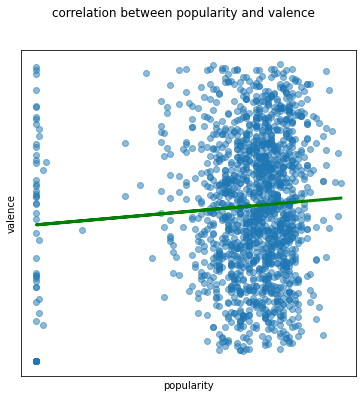

In [31]:
x = filtered_data["popularity"].values
y = filtered_data["valence"].values
x = x.reshape(x.shape[0], 1)
y = y.reshape(y.shape[0], 1)
regr = linear_model.LinearRegression()
regr.fit(x, y)
fig = plt.figure(figsize=(6, 6))
fig.suptitle("correlation between popularity and valence")
ax = plt.subplot(1, 1, 1)
ax.scatter(x, y, alpha=0.5)
ax.plot(x, regr.predict(x), color="green", linewidth=3)
plt.xticks(())
plt.yticks(())
plt.xlabel("popularity")
plt.ylabel("valence")
plt.show()

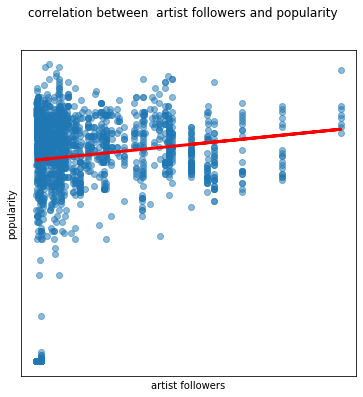

In [32]:
x = filtered_data["artist followers"].values
y = filtered_data["popularity"].values
x = x.reshape(x.shape[0], 1)
y = y.reshape(y.shape[0], 1)
regr = linear_model.LinearRegression()
regr.fit(x, y)
fig = plt.figure(figsize=(6, 6))
fig.suptitle("correlation between  artist followers and popularity")
ax = plt.subplot(1, 1, 1)
ax.scatter(x, y, alpha=0.5)
ax.plot(x, regr.predict(x), color="red", linewidth=3)
plt.xticks(())
plt.yticks(())
plt.xlabel("artist followers")
plt.ylabel("popularity")
plt.show()

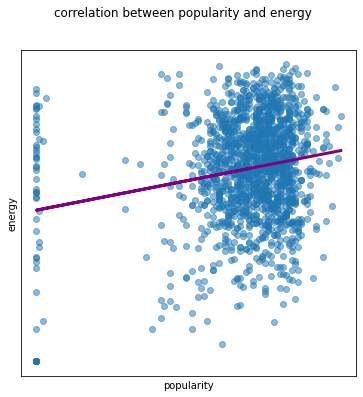

In [33]:
x = filtered_data["popularity"].values
y = filtered_data["energy"].values
x = x.reshape(x.shape[0], 1)
y = y.reshape(y.shape[0], 1)
regr = linear_model.LinearRegression()
regr.fit(x, y)
fig = plt.figure(figsize=(6, 6))
fig.suptitle("correlation between popularity and energy")
ax = plt.subplot(1, 1, 1)
ax.scatter(x, y, alpha=0.5)
ax.plot(x, regr.predict(x), color="purple", linewidth=3)
plt.xticks(())
plt.yticks(())
plt.xlabel("popularity")
plt.ylabel("energy")
plt.show()

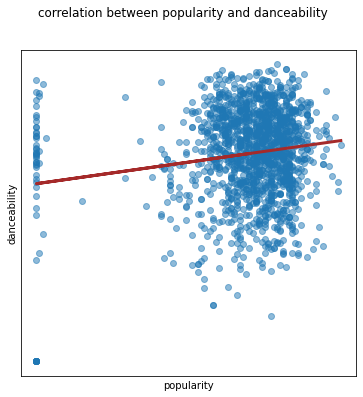

In [34]:
x = filtered_data["popularity"].values
y = filtered_data["danceability"].values
x = x.reshape(x.shape[0], 1)
y = y.reshape(y.shape[0], 1)
regr = linear_model.LinearRegression()
regr.fit(x, y)
fig = plt.figure(figsize=(6, 6))
fig.suptitle("correlation between popularity and danceability")
ax = plt.subplot(1, 1, 1)
ax.scatter(x, y, alpha=0.5)
ax.plot(x, regr.predict(x), color="brown", linewidth=3)
plt.xticks(())
plt.yticks(())
plt.xlabel("popularity")
plt.ylabel("danceability")
plt.show()

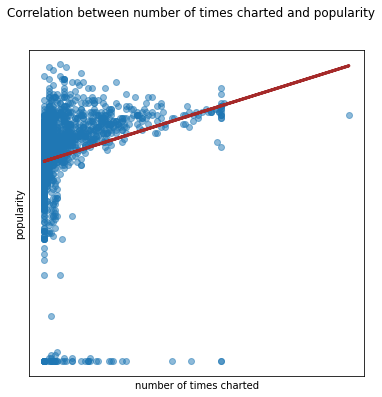

In [35]:
x = filtered_data["number of times charted"].values
y = filtered_data["popularity"].values

x = x.reshape(x.shape[0], 1)
y = y.reshape(y.shape[0], 1)

regr = linear_model.LinearRegression()
regr.fit(x, y)

fig = plt.figure(figsize=(6, 6))
fig.suptitle("Correlation between number of times charted and popularity")

ax = plt.subplot(1, 1, 1)
ax.scatter(x, y, alpha=0.5)
ax.plot(x, regr.predict(x), color="brown", linewidth=3)
plt.xticks(())
plt.yticks(())


plt.xlabel("number of times charted")
plt.ylabel("popularity")

plt.show()

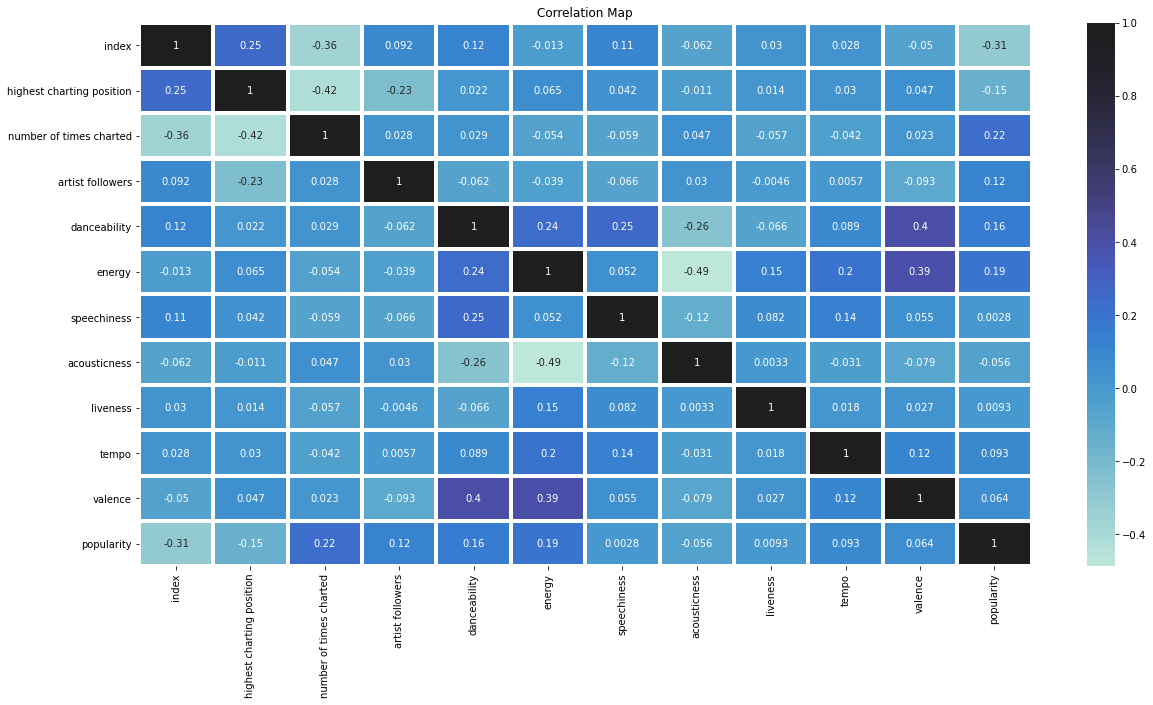

In [36]:
#Heatmap
plt.figure(figsize=(20,10))
plt.title('Correlation Map')
ax=sns.heatmap(filtered_data.corr(),linewidth=3.1,annot=True,center=1)

## Zoomed-in Heatmap

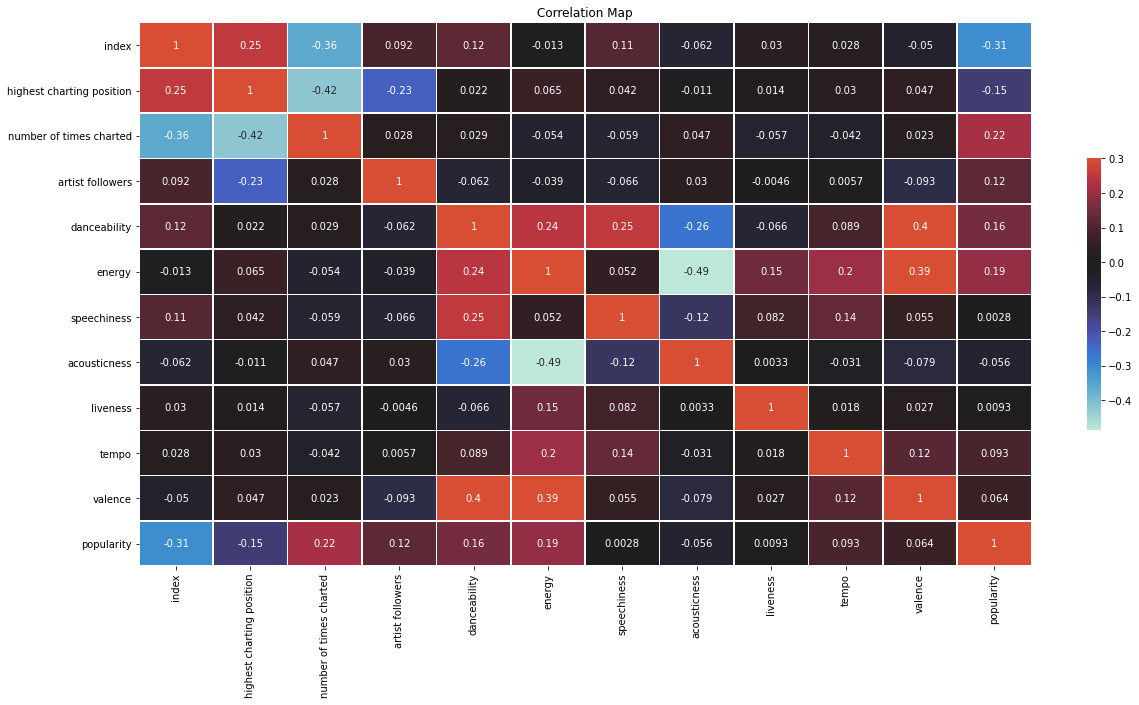

In [37]:
#Heatmap
plt.figure(figsize=(20,10))
plt.title('Correlation Map')
ax=sns.heatmap(filtered_data.corr(), annot=True, vmax=.3, center=0,
            square=False, linewidths=.5, cbar_kws={"shrink": .5})

# Correlation between all Numericals

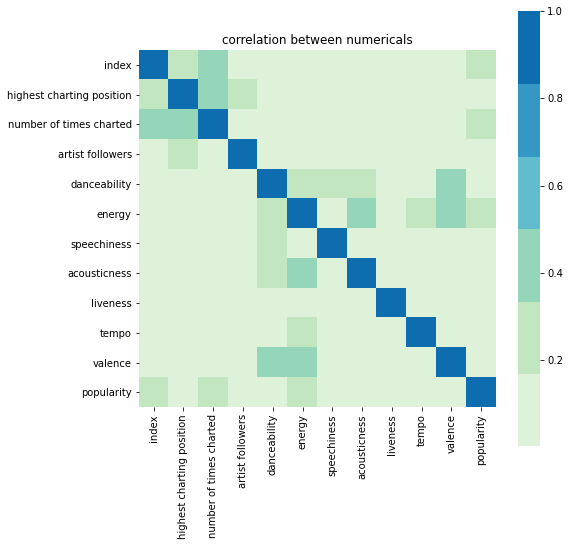

In [38]:
# Heatmap with ALL NUMERICALS
chosen_columns = filtered_data.columns[filtered_data.dtypes != 'object']
df = pd.DataFrame(data=filtered_data, columns=chosen_columns, index=filtered_data.index)
corr = np.abs(df.corr())
fig, ax = plt.subplots(figsize=(8, 8))
cmap = sns.color_palette("GnBu")
sns.heatmap(corr, cmap=cmap, square=True)
plt.title('correlation between numericals')
plt.show()

# What correlates to popularity?

In [39]:
series = np.abs(corr['popularity']).sort_values(ascending=False)
print('linear correlated features to popularity \n')
for i, row in enumerate(series):
    if 0.1 <= row < 1:
      print(f'{series.index[i]:17} --> {row: .2f} (abs)')

linear correlated features to popularity 

index             -->  0.31 (abs)
number of times charted -->  0.22 (abs)
energy            -->  0.19 (abs)
danceability      -->  0.16 (abs)
highest charting position -->  0.15 (abs)
artist followers  -->  0.12 (abs)


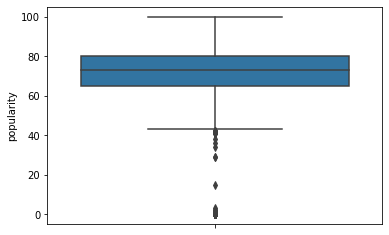

In [40]:
sns.boxplot( y = filtered_data["popularity"])
plt.show()

In [41]:
# #classified by genre variable 
# filtered_genre =filtered_data.groupby("genre").sum() #code works to group by different metrics
# filtered_genre.head(10)

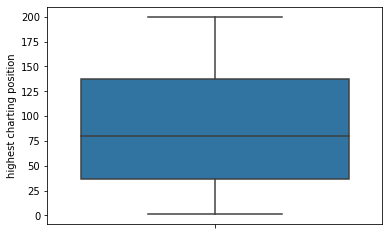

In [42]:
sns.boxplot( y = filtered_data["highest charting position"])
plt.show()

# Highest charting position vs popularity histograms

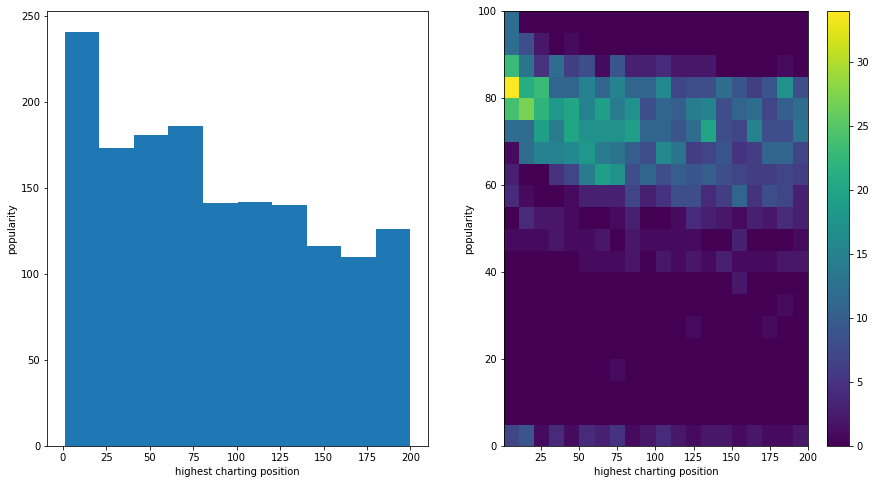

In [43]:
x = 'highest charting position'
y = 'popularity'
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=False, sharex=False, figsize=(15, 8))
#fig.suptitle('highest charting position and popularity Histograms')
h = ax2.hist2d(filtered_data[x], filtered_data[y], bins=20)
ax1.hist(filtered_data['highest charting position'])
ax2.set_xlabel(x)
ax2.set_ylabel(y)
ax1.set_xlabel('highest charting position')
ax1.set_ylabel('popularity')
plt.colorbar(h[3], ax=ax2)
plt.show()

# Artist followers vs popularity histograms 

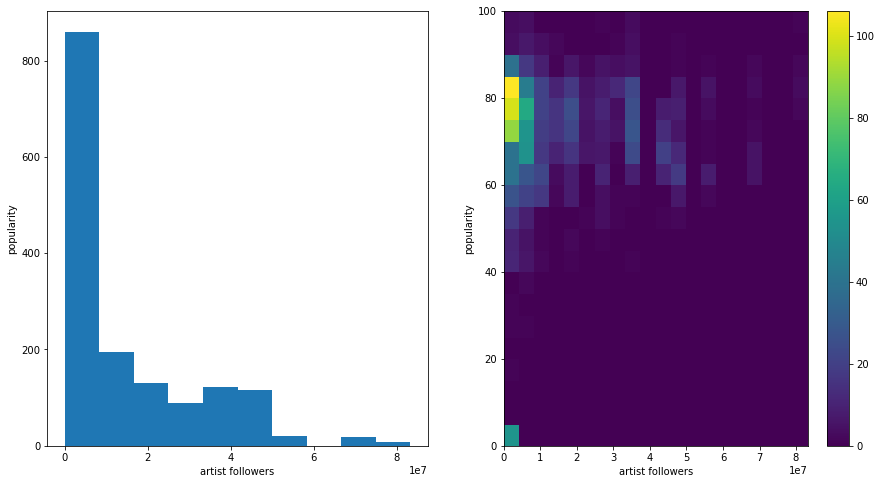

In [44]:
x = 'artist followers'
y = 'popularity'
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=False, sharex=False, figsize=(15, 8))
#fig.suptitle('artist followers and popularity Histograms')
h = ax2.hist2d(filtered_data[x], filtered_data[y], bins=20)
ax1.hist(filtered_data['artist followers'])
ax2.set_xlabel(x)
ax2.set_ylabel(y)
ax1.set_xlabel('artist followers')
ax1.set_ylabel('popularity')
plt.colorbar(h[3], ax=ax2)
plt.show()

# Danceability vs popularity histograms

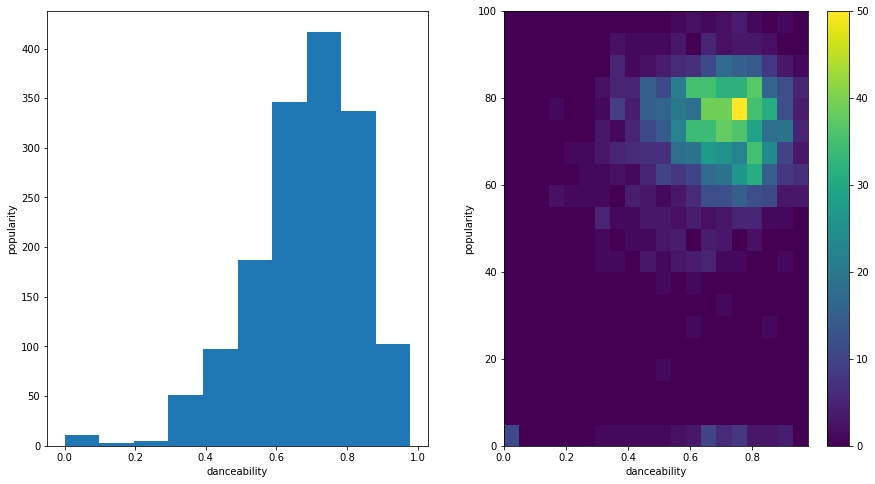

In [45]:
x = 'danceability'
y = 'popularity'
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=False, sharex=False, figsize=(15, 8))
#fig.suptitle('danceability and popularity Histograms')
h = ax2.hist2d(filtered_data[x], filtered_data[y], bins=20)
ax1.hist(filtered_data['danceability'])
ax2.set_xlabel(x)
ax2.set_ylabel(y)
ax1.set_xlabel('danceability')
ax1.set_ylabel('popularity')
plt.colorbar(h[3], ax=ax2)
plt.show()

# Valence vs popularity histograms

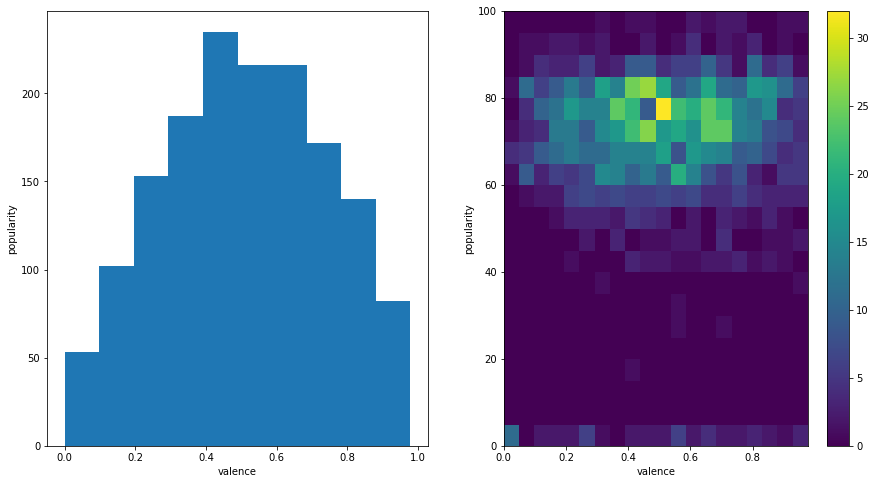

In [46]:
x = 'valence'
y = 'popularity'
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=False, sharex=False, figsize=(15, 8))
#fig.suptitle('valence and popularity Histograms')
h = ax2.hist2d(filtered_data[x], filtered_data[y], bins=20)
ax1.hist(filtered_data['valence'])
ax2.set_xlabel(x)
ax2.set_ylabel(y)
ax1.set_xlabel('valence')
ax1.set_ylabel('popularity')
plt.colorbar(h[3], ax=ax2)
plt.show()

In [47]:
#number of artists
filtered_data['artist'].nunique()

716

In [48]:
# top artists by top song count
artist_count = filtered_data["artist"].value_counts()
artist_count

Taylor Swift                                                             52
Lil Uzi Vert                                                             32
Justin Bieber                                                            32
Juice WRLD                                                               30
Pop Smoke                                                                29
                                                                         ..
Bad Bunny, Sech                                                           1
Kygo, Kim Petras                                                          1
Kanye West, Travis Scott                                                  1
StaySolidRocky, Lil Uzi Vert                                              1
J Balvin, KAROL G, Nicky Jam, Crissin, Totoy El Frio, Natan & Shander     1
Name: artist, Length: 716, dtype: int64

# Top artist songs 

In [49]:
display(print('Top artist songs'))
artist_top = artist_count.index.tolist()[:1]
for x in artist_top:
    count_filtered_data = filtered_data[filtered_data["artist"]==x]["song name"].value_counts()
    print(count_filtered_data,"\n\nNumber of Distinct Songs",len(count_filtered_data))


Top artist songs


None

Hey Stephen (Taylor’s Version)                                              1
You’re Not Sorry (Taylor’s Version)                                         1
Don’t You (Taylor’s Version) (From The Vault)                               1
Tell Me Why (Taylor’s Version)                                              1
Christmas Tree Farm                                                         1
Breathe (feat. Colbie Caillat) (Taylor’s Version)                           1
long story short                                                            1
mirrorball                                                                  1
peace                                                                       1
champagne problems                                                          1
the 1                                                                       1
You Need To Calm Down                                                       1
closure                                                         

In [50]:
#Taylor_Swift_chart = filtered_data[filtered_data["artist"]=="Taylor Swift"]["song name"].value_counts().index.tolist()

In [51]:
# Taylor_Swift_rank = {}
# for z in Taylor_Swift_chart:
#     Taylor_Swift_rank[z] = {}
#     Taylor_Swift_rank[z]["rank"] = []
#     Taylor_Swift_rank[z]["date"] = []
#     Taylor_Swift_rank[z]["rank"] = data[data["song name"]==z]["highest charting position"].values
#     Taylor_Swift_rank[z]["date"] = data[data["song name"]==z]["release date"].values



In [52]:
# plt.figure(figsize=(20,10))
# check = range(1,5)
# add = 0
# for m in Taylor_Swift_rank:
#     if(add in check):
#         x = Taylor_Swift_rank[m]["date"]
#         y = Taylor_Swift_rank[m]["rank"]
        
#         plt.plot(x,y,"-o",label=i)
#     add = add + 1

# x1 = Taylor_Swift_rank['You All Over Me (feat. Maren Morris) (Taylor’s Version) (From The Vault)']["date"]
# y1 = Taylor_Swift_rank['cowboy like me']["rank"]
# plt.plot(x1,y1,"--o",label="Forever & Always (Taylor’s Version)")



# plt.legend()
# plt.xticks(rotation=90)
# plt.show()

# Taylor Swift by highest charting position

In [53]:
filtered_data[(filtered_data["artist"]=="Taylor Swift") & (filtered_data["highest charting position"]<=25)]["song name"].value_counts()

Love Story (Taylor’s Version)                             1
‘tis the damn season                                      1
champagne problems                                        1
seven                                                     1
mirrorball                                                1
exile (feat. Bon Iver)                                    1
cardigan                                                  1
august                                                    1
willow                                                    1
tolerate it                                               1
Mr. Perfectly Fine (Taylor’s Version) (From The Vault)    1
this is me trying                                         1
gold rush                                                 1
betty                                                     1
the last great american dynasty                           1
my tears ricochet                                         1
invisible string                        

# Taylor Swift songs by number of times charted

In [54]:
filtered_data[(filtered_data["artist"]=="Taylor Swift") & (filtered_data["number of times charted"]<=10)]["song name"].value_counts()

Hey Stephen (Taylor’s Version)                                              1
closure                                                                     1
Don’t You (Taylor’s Version) (From The Vault)                               1
Tell Me Why (Taylor’s Version)                                              1
Christmas Tree Farm                                                         1
Breathe (feat. Colbie Caillat) (Taylor’s Version)                           1
long story short                                                            1
mirrorball                                                                  1
peace                                                                       1
champagne problems                                                          1
the 1                                                                       1
You Need To Calm Down                                                       1
Lover (Remix) [feat. Shawn Mendes]                              

# Justin Bieber by highest charting position

In [55]:
print('Justin_Bieber highest charting position songs')
Justin_Bieber_chart = filtered_data[filtered_data["artist"]=="Justin Bieber"]["song name"].value_counts().index.tolist()
filtered_data[(filtered_data["artist"]=="Justin Bieber") & (filtered_data["highest charting position"]<=25)]["song name"].value_counts()

Justin_Bieber highest charting position songs


Anyone                                    1
As I Am (feat. Khalid)                    1
Mistletoe                                 1
Peaches (feat. Daniel Caesar & Giveon)    1
Holy (feat. Chance The Rapper)            1
Intentions (feat. Quavo)                  1
Forever (feat. Post Malone & Clever)      1
Yummy                                     1
Hold On                                   1
Lonely (with benny blanco)                1
Name: song name, dtype: int64

# Lil Uzi Vert by highest charting position

In [56]:
print('Lil_Uzi_Vert highest charting position songs')
Lil_Uzi_Vert_chart = filtered_data[filtered_data["artist"]=="Lil Uzi Vert"]["song name"].value_counts().index.tolist()
filtered_data[(filtered_data["artist"]=="Lil Uzi Vert") & (filtered_data["highest charting position"]<=25)]["song name"].value_counts()

Lil_Uzi_Vert highest charting position songs


P2                        1
That Way - Bonus Track    1
Baby Pluto                1
Name: song name, dtype: int64

In [57]:
# x = 'streams'
# y = 'highest charting position'

# fig, (ax1, ax2) = plt.subplots(1, 2, sharey=False, sharex=False, figsize=(15, 8))
# fig.suptitle('streams and highest charting position Histograms')
# h = ax2.hist2d(filtered_data[x], filtered_data[y], bins=20)
# ax1.hist(filtered_data['streams'])

# ax2.set_xlabel(x)
# ax2.set_ylabel(y)

# ax1.set_xlabel('streams')
# ax1.set_ylabel('highest charting position')

# plt.colorbar(h[3], ax=ax2)
# plt.show()

In [58]:
# # number of songs for each genre
# print(type(filtered_data['genre']))
# popular_genre = filtered_data.groupby('genre').size().unique
# print(popular_genre)
# genre_list = filtered_data['genre'].values.tolist()

In [59]:
# display(print('Number of songs for each artist'))
# print(filtered_data.groupby('artist').size())
# popular_artist = filtered_data.groupby('artist').size()
# print(popular_artist)
# artist_list = filtered_data['artist'].values.tolist()

## Plot of top 10 most popular artists by number of top songs

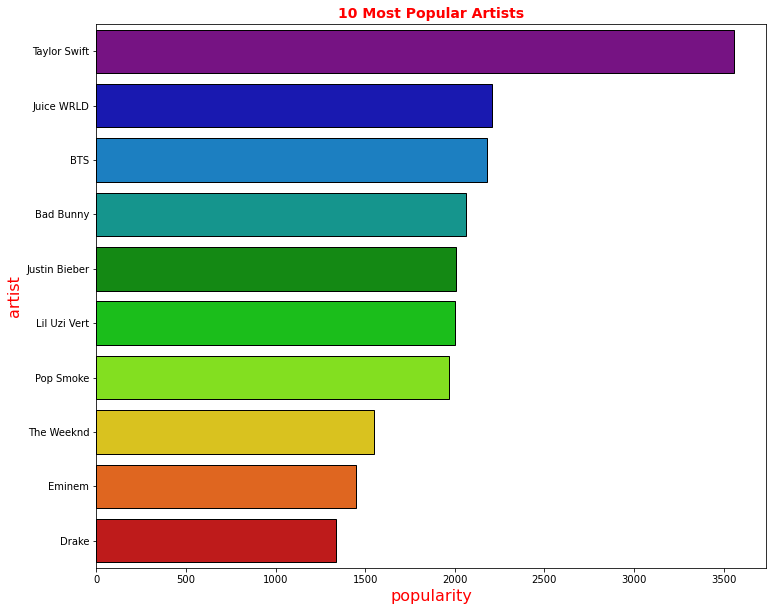

In [60]:
# Plot
fig, ax = plt.subplots(figsize = (12, 10))
lead_artists = filtered_data.groupby('artist')['popularity'].sum().sort_values(ascending=False).head(10)
ax = sns.barplot(x=lead_artists.values, y=lead_artists.index, palette="nipy_spectral", orient="h", edgecolor='black', ax=ax)
ax.set_xlabel('popularity', c='r', fontsize=16)
ax.set_ylabel('artist', c='r', fontsize=16)
ax.set_title('10 Most Popular Artists', c='r', fontsize=14, weight = 'bold')
plt.show()

In [61]:
top_10 = filtered_data["artist"].value_counts().head(10).to_frame()

top_10['Index'] = range(0, 0+len(top_10))
top_10 = top_10.reset_index().set_index('Index')
top_10 = top_10.rename(columns = {"index" : "Artist Name", "artist" : "Top Songs Count"})
#top_10

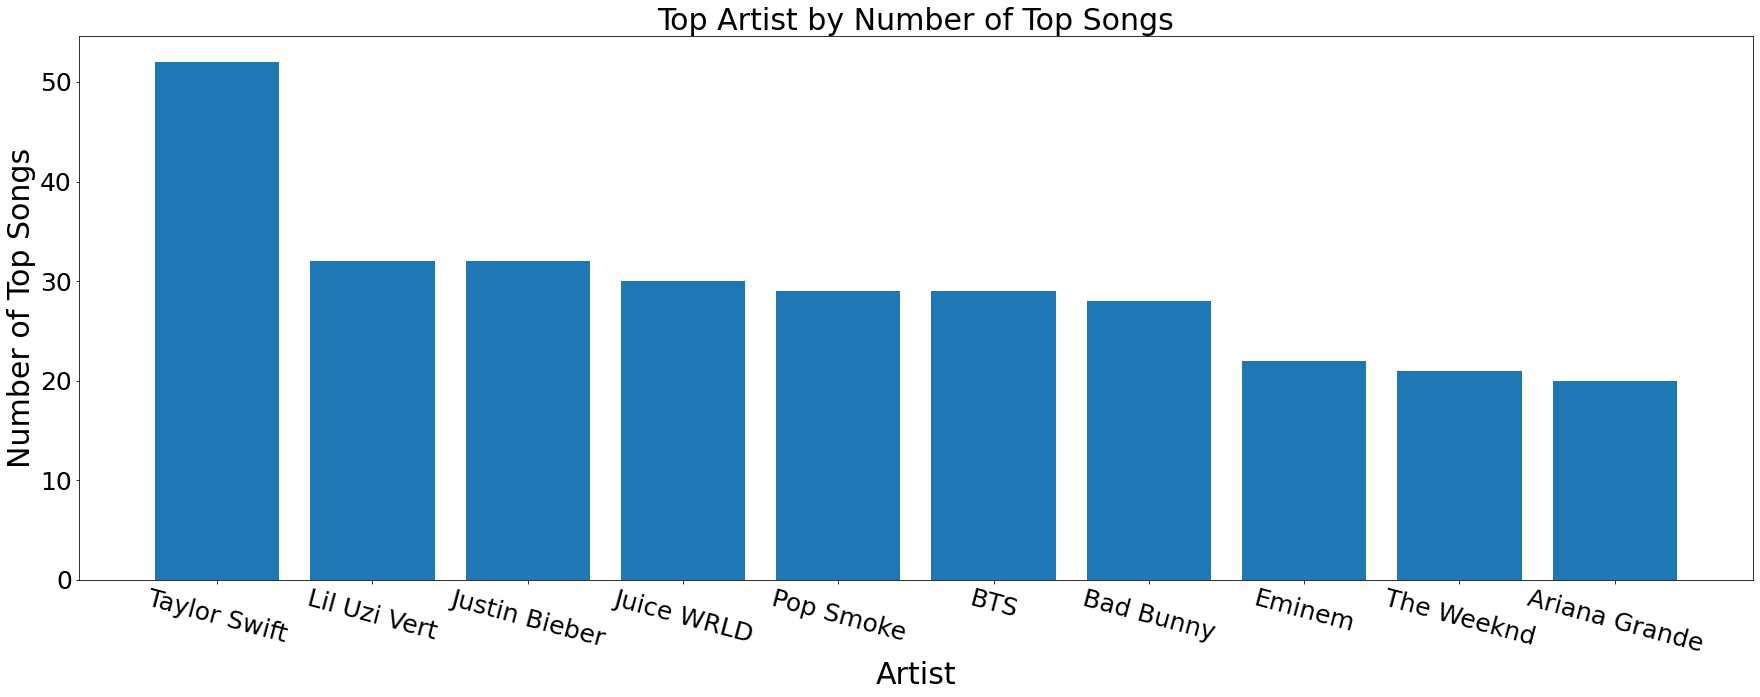

In [62]:
artist = top_10["Artist Name"]
songs_count = top_10["Top Songs Count"]
plt.rcParams["figure.figsize"] = (30,10)
plt.rcParams.update({'font.size' : 30})
plt.subplot().set_title('Top Artist by Number of Top Songs', fontsize = 30) #number of times charted
plt.xticks(fontsize = 25, rotation=-15)
plt.yticks(fontsize =25)
plt.bar(artist, songs_count)
plt.xlabel("Artist")
plt.ylabel("Number of Top Songs")
plt.show()

# Top 10 artists by number of top songs

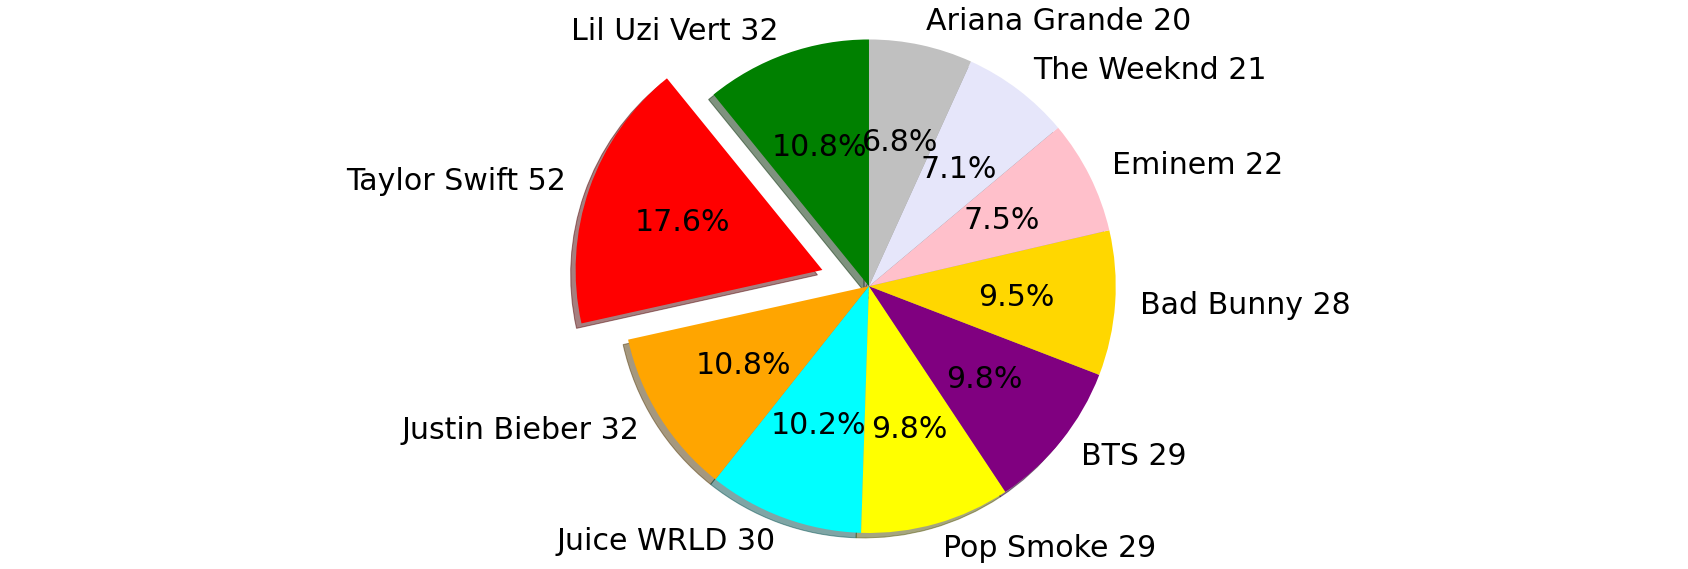

In [63]:
import matplotlib.pyplot as plt
fig = {'Lil Uzi Vert 32':32,
        'Taylor Swift 52':52,
        'Justin Bieber 32':32,
        'Juice WRLD 30':30,
        'Pop Smoke 29':29,
        'BTS 29':29,
        'Bad Bunny 28':28,
        'Eminem 22':22,
        'The Weeknd 21':21,
        'Ariana Grande 20':20}
colors = ['green', 'red', 'orange', 'cyan', 'yellow','purple','gold','pink','lavender','silver'] 
highlight =(0,0.2,0,0,0,0,0,0,0,0)
plt.pie(list(fig.values()), explode=highlight, labels=fig.keys(), colors=colors, autopct='%2.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.show()

 ## Top 5 artists by number of top songs

In [64]:
top_5 = filtered_data["artist"].value_counts().head(5).to_frame()
top_5['Index'] = range(0, 0+len(top_5))
top_5 = top_5.reset_index().set_index('Index')
top_5 = top_5.rename(columns = {"index" : "Artist Name", "artist" : "Top Songs Count"})
#top_5

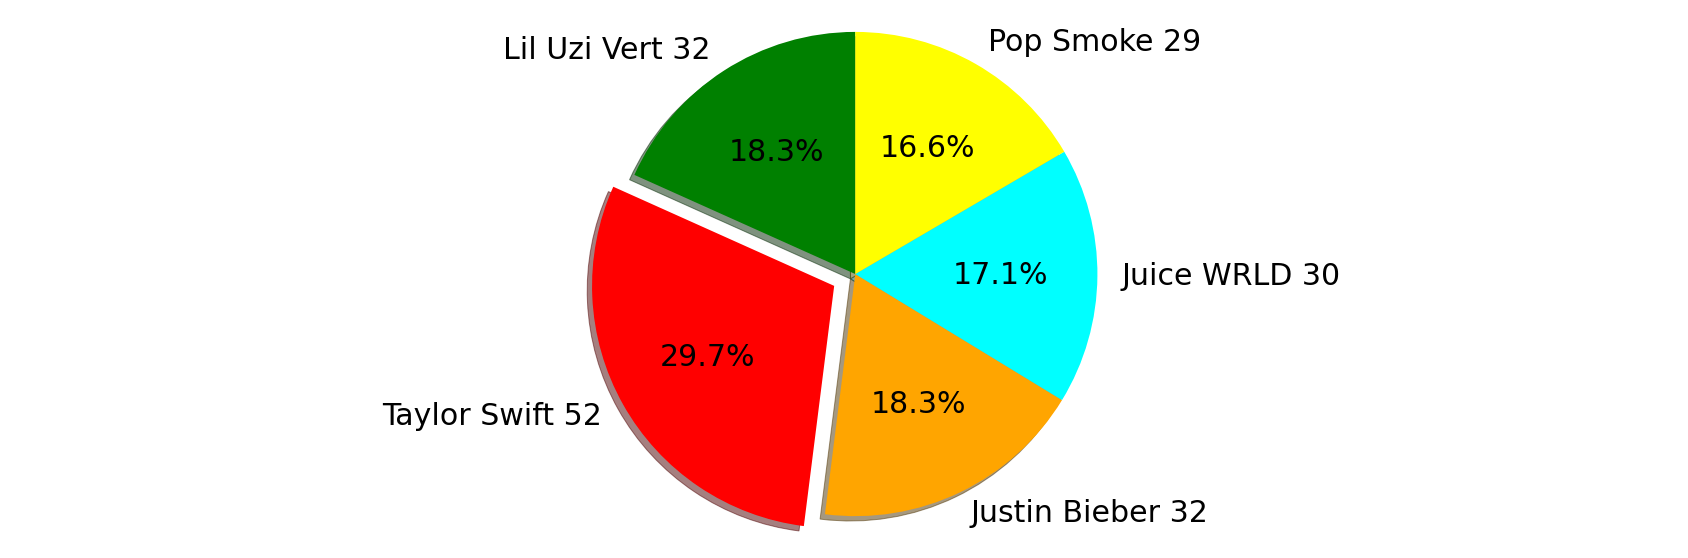

In [65]:
import matplotlib.pyplot as plt
fig = {'Lil Uzi Vert 32':32,
        'Taylor Swift 52':52,
        'Justin Bieber 32':32,
        'Juice WRLD 30':30,
        'Pop Smoke 29':29}
colors = ['green', 'red', 'orange', 'cyan', 'yellow'] 
highlight =(0,0.1,0,0,0)
plt.pie(list(fig.values()), explode=highlight, labels=fig.keys(), colors=colors, autopct='%2.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.show()

# Box Whisker Plot of music metrics 

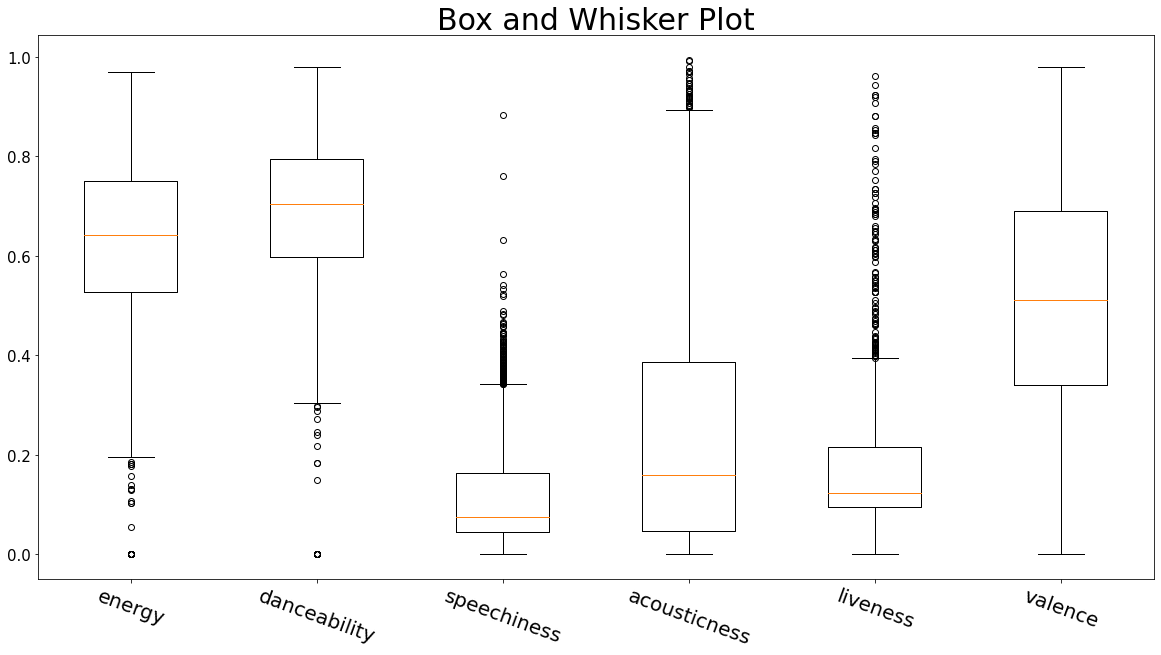

In [66]:
tech_metric = filtered_data[['energy', 'danceability','speechiness','acousticness', 'liveness', 'valence']]
plt.rcParams["figure.figsize"] = (20,10)
plt.rcParams.update({'font.size': 15})
plt.subplot().set_title('Box and Whisker Plot', fontsize = 30);
plt.xticks(fontsize = 20, rotation=-20)
plt.boxplot(tech_metric);
plt.xticks([1, 2, 3, 4, 5, 6], ['energy', 'danceability','speechiness','acousticness', 'liveness', 'valence']);

# export to csv

In [132]:
filtered_data.to_csv('C:\\Users\\eddie\\Desktop\\Ironhack\\week5\\PROJECT WK5\\final spotify\\filtered_data.csv')

In [140]:
tech_metric_plus = filtered_data[['popularity','energy', 'danceability','speechiness','acousticness', 'liveness', 'valence']]


In [134]:
tech_metric_plus.to_csv('C:\\Users\\eddie\\Desktop\\Ironhack\\week5\\PROJECT WK5\\final spotify\\tech_metric_plus.csv')

In [135]:
tech_metric.to_csv('C:\\Users\\eddie\\Desktop\\Ironhack\\week5\\PROJECT WK5\\final spotify\\tech_metric.csv')

In [136]:
filtered_data.to_excel('C:\\Users\\eddie\\Desktop\\Ironhack\\week5\\PROJECT WK5\\final spotify\\filtered_data.xlsx')

In [137]:
tech_metric.to_excel('C:\\Users\\eddie\\Desktop\\Ironhack\\week5\\PROJECT WK5\\final spotify\\tech_metric.xlsx')

In [138]:
tech_metric_plus.to_excel('C:\\Users\\eddie\\Desktop\\Ironhack\\week5\\PROJECT WK5\\final spotify\\tech_metric_plus.xlsx')

# Hypothesis

In [71]:
#filtered_data.dtypes

In [72]:
filtered_data_target = filtered_data['popularity']
filtered_data_target

0       100.0
1        99.0
2        99.0
3        98.0
4        96.0
        ...  
1551     79.0
1552     66.0
1553     81.0
1554     60.0
1555     70.0
Name: popularity, Length: 1556, dtype: float64

In [73]:
filtered_data_target.mean()

69.59383033419023

In [74]:
import scipy.stats
confidence_level = 0.95
degrees_freedom = len(filtered_data_target) - 1  # or, for large values of sample size, just use that
sample_mean = np.mean(filtered_data_target)
# note that we use the standard error of the sample 
# as an estimate of the standard error of the population (which is used in the theoretical formula)
sample_standard_error = scipy.stats.sem(filtered_data_target) # sem = standard error of the mean = std(mean)/sqrt(samplesize)
confidence_interval = scipy.stats.t.interval(confidence_level, 
                                             degrees_freedom, 
                                             sample_mean, 
                                             sample_standard_error)

In [75]:
print( 'confidence interval for the popularity mean is:', confidence_interval)

confidence interval for the popularity mean is: (68.75711555233923, 70.43054511604123)


In [76]:
from scipy.stats import ttest_1samp
stat, pval = ttest_1samp(filtered_data_target, 75)  #H0 = Someone thinks that the mean popularity of all songs is 75.  

# Two-sided test:
# Null hypothesis or H0: mean popularity value = 75
# Alternative hyp or H1: mean popularity value != 75

In [77]:
print('stat is  ', stat)
#print('pvalue for the two-tailed test is ', pval)
print('pvalue for the one-tailed test is ', pval/2)               #stat is negative means actual is lower

stat is   -12.673556040934427
pvalue for the one-tailed test is  2.1124909952720035e-35


# p is low, null must go: we reject the H0
# so we assume the actual population mean is lower than 75 (because negative stat number)!

In [78]:
# https://vedexcel.com/how-to-calculate-confidence-intervals-in-python/
# https://www.statisticshowto.com/probability-and-statistics/hypothesis-testing/#Hypothesis
import numpy as np
import scipy.stats as st
#Calculate the sample parameters
confidenceLevel = 0.95   # 95% CI given
degrees_freedom = len(filtered_data_target)-1  #degree of freedom = sample size-1
sampleMean = np.mean(filtered_data_target)    #sample mean
sampleStandardError = st.sem(filtered_data_target)  #sample standard error
#create 95% confidence interval for the population mean
confidenceInterval = st.t.interval(alpha=confidenceLevel, df=degrees_freedom, loc=sampleMean, scale=sampleStandardError)
#print the 95% confidence interval for the population mean
print('The 95% confidence interval for the populatity mean:',confidenceInterval)

The 95% confidence interval for the populatity mean: (68.75711555233923, 70.43054511604123)


In [79]:
# using T-distribution
import numpy as np
import scipy.stats as st
#Calculate the sample parameters
confidenceLevel = 0.98             #98% CI given
degrees_freedom = len(filtered_data_target)-1      #degree of freedom = sample size-1
sampleMean = np.mean(filtered_data_target)          #sample mean
sampleStandardError = st.sem(filtered_data_target)   #sample standard error
#create 98% confidence interval for the population mean
confidenceInterval = st.t.interval(alpha=confidenceLevel, df=degrees_freedom, loc=sampleMean, scale=sampleStandardError)
#print the 98% confidence interval for the population mean
print('The 98% confidence interval for the popularity mean:',confidenceInterval)

The 98% confidence interval for the popularity mean: (68.60045414985328, 70.58720651852718)


In [142]:
# using Normal Distribution
import numpy as np
import scipy.stats as st
# Using seed function to generate the same random number every time with the same seed value
np.random.seed(20)

#Calculate the sample parameters
confidenceLevel_1 = 0.95           #99% CI given
confidenceLevel_2 = 0.99           #99% CI given
degrees_freedom = len(filtered_data_target)-1      #degree of freedom = sample size-1
sampleMean = np.mean(filtered_data_target)         #sample mean 
sampleStandardError = st.sem(filtered_data_target) #sample standard error
#create 95% confidence interval for the population mean
confidenceInterval_1 = st.norm.interval(alpha=confidenceLevel_1,loc=sampleMean,scale=sampleStandardError)
#create 99% confidence interval for the population mean
confidenceInterval_2 = st.norm.interval(alpha=confidenceLevel_2,loc=sampleMean,scale=sampleStandardError)
#print the 95% confidence interval for the population mean
print('The 95% confidence interval for the popularity mean:',confidenceInterval_1)
#print the 99% confidence interval for the population mean
print('The 99% confidence interval for the popularity mean:',confidenceInterval_2)    #so the 99% confidence interval results in a slightly broader mean range

The 95% confidence interval for the popularity mean: (68.75776681696773, 70.42989385141273)
The 99% confidence interval for the popularity mean: (68.4950566198379, 70.69260404854256)


In [81]:
#-----------------------BIG GRAPH DANGER-----------
# labels = filtered_data.artist.value_counts().index
# sizes =  filtered_data.artist.value_counts().values
# colors = ['red', 'pink', 'blue','cyan', 'green', 'black','yellow']
# plt.figure(figsize=(10,10))
# plt.pie(sizes, labels=labels, colors=colors)
# autopct = ('%1.1f%')
# plt.axis('equal')
# plt.show()


# Linear Regression model of technical music metrics vs popularity

In [120]:
#Linear regression
from sklearn.model_selection import train_test_split
X=filtered_data.loc[:,['energy','danceability','speechiness','valence','liveness','acousticness']].values
y=filtered_data.loc[:,'popularity'].values

In [121]:
#print(X)

In [122]:
#print(y)

In [123]:
#train test

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)

In [125]:
print(X.shape, X_train.shape, X_test.shape)

(1556, 6) (1167, 6) (389, 6)


In [126]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print(regressor.intercept_)
print(regressor.coef_)

47.691342794446825
[21.45837663 16.11909161 -2.97840609 -5.58102049 -2.55484965  4.28935113]


In [127]:
y_pred = regressor.predict(X_test)
filtered_data_pred = pd.DataFrame({'actual':y_test, 'predicted':y_pred})  #depends on X_test TEST SIZE
print(filtered_data_pred)

     actual  predicted
0      81.0  71.846242
1      84.0  68.625548
2      76.0  73.241255
3      63.0  73.141869
4      81.0  73.102263
..      ...        ...
384    68.0  70.704765
385    63.0  75.329557
386    87.0  65.669780
387    71.0  67.520759
388    67.0  65.495375

[389 rows x 2 columns]


In [130]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

MSE = mean_squared_error(y_test,y_pred)
print('MSE:',round(MSE,1))
RMSE = np.sqrt(mean_squared_error(y_test,y_pred))  #mean is 69
print('RMSE:',round(RMSE,1))
MAE = mean_absolute_error(y_test, y_pred)
print('MAE:',round(MAE,1))
mse_mean=np.mean(mse)
#print('Mean Squared Error: ',mse_mean)
diff=MSE-abs(mse_mean)
print('DIFF',diff)
print(model.summary())  

MSE: 248.0
RMSE: 15.7
MAE: 10.7
DIFF -45.40015869627513
                            OLS Regression Results                            
Dep. Variable:           danceability   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     38.96
Date:                Wed, 17 Nov 2021   Prob (F-statistic):           5.57e-10
Time:                        17:53:37   Log-Likelihood:                 730.29
No. Observations:                1556   AIC:                            -1457.
Df Residuals:                    1554   BIC:                            -1446.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

Text(0, 0.5, 'Test Values')

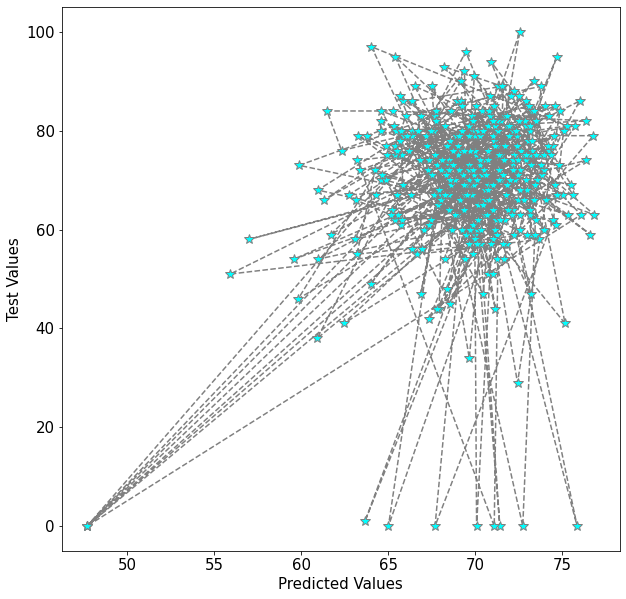

In [129]:
# https://www.tutorialgateway.org/python-matplotlib-scatter-plot/
# https://twiki.ph.rhul.ac.uk/twiki/pub/Students/UnderGraduates/PostExamPython/PostExamPython-Matplotlib_tutorial.html
# https://towardsdatascience.com/making-publication-quality-figures-in-python-part-ii-line-plot-legends-colors-4430a5891706
plt.figure(figsize=(10,10))
plt.plot(y_pred, y_test, color='grey', linestyle='--', marker='*', markerfacecolor='cyan', markersize=10) # https://zhuanlan.zhihu.com/p/81787851
plt.xlabel('Predicted Values')
plt.ylabel('Test Values')

In [107]:
filtered_data.columns

Index(['index', 'highest charting position', 'number of times charted',
       'song name', 'streams', 'artist', 'artist followers', 'genre',
       'release date', 'weeks charted', 'danceability', 'energy', 'loudness',
       'speechiness', 'acousticness', 'liveness', 'tempo', 'valence', 'chord',
       'popularity'],
      dtype='object')

# Danceability vs Popularity Linear Regression

In [118]:
# https://www.statology.org/simple-linear-regression-in-python/
import statsmodels.api as sm
y = filtered_data['danceability']
x = filtered_data['popularity']
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
mse_mean=np.mean(mse)
print('Mean Squared Error: ',mse_mean)
diff=MSE-abs(mse_mean)
print('DIFF',diff)
print(model.summary())        

Mean Squared Error:  -293.3886176196472
DIFF -91.33438618952897
                            OLS Regression Results                            
Dep. Variable:           danceability   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     38.96
Date:                Wed, 17 Nov 2021   Prob (F-statistic):           5.57e-10
Time:                        17:52:54   Log-Likelihood:                 730.29
No. Observations:                1556   AIC:                            -1457.
Df Residuals:                    1554   BIC:                            -1446.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------

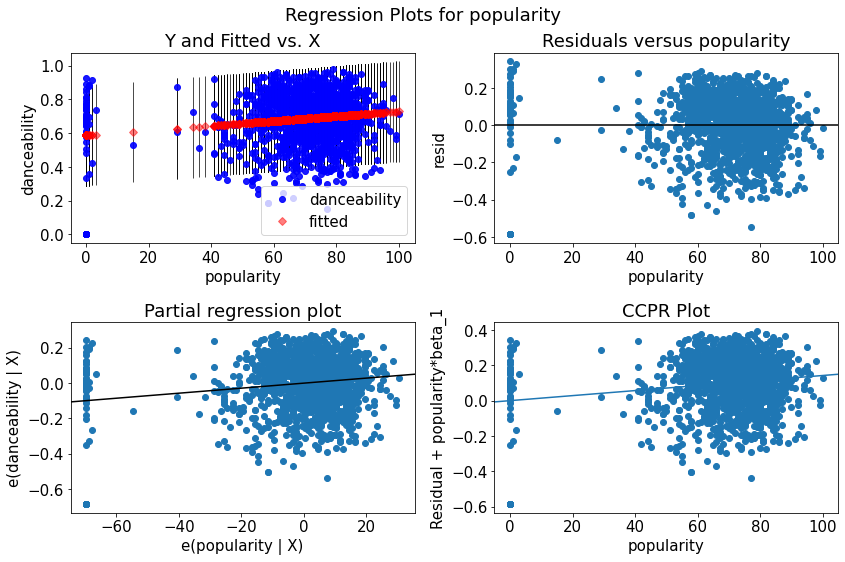

In [109]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model, 'popularity', fig=fig)

# Valence vs popularity Linear Regression

In [117]:
import statsmodels.api as sm
y = filtered_data['valence']
x = filtered_data['popularity']
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
mse_mean=np.mean(mse)
print('Mean Squared Error: ',mse_mean)
diff=MSE-abs(mse_mean)
print('DIFF',diff)
print(model.summary())    

Mean Squared Error:  -293.3886176196472
DIFF -91.33438618952897
                            OLS Regression Results                            
Dep. Variable:                valence   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     6.478
Date:                Wed, 17 Nov 2021   Prob (F-statistic):             0.0110
Time:                        17:52:47   Log-Likelihood:                 78.691
No. Observations:                1556   AIC:                            -153.4
Df Residuals:                    1554   BIC:                            -142.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------

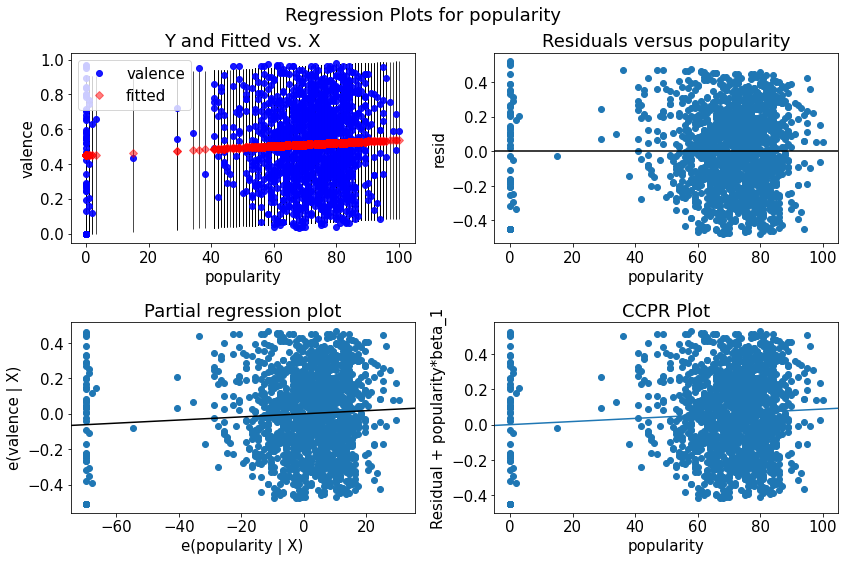

In [111]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model, 'popularity', fig=fig)

# Energy vs popularity model

In [131]:
import statsmodels.api as sm
y = filtered_data['energy']
x = filtered_data['popularity']
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
mse_mean=np.mean(mse)
print('Mean Squared Error: ',mse_mean)
diff=MSE-abs(mse_mean)
print('DIFF',diff)
print(model.summary())  

Mean Squared Error:  -293.3886176196472
DIFF -45.40015869627513
                            OLS Regression Results                            
Dep. Variable:                 energy   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     60.51
Date:                Wed, 17 Nov 2021   Prob (F-statistic):           1.32e-14
Time:                        17:54:09   Log-Likelihood:                 583.80
No. Observations:                1556   AIC:                            -1164.
Df Residuals:                    1554   BIC:                            -1153.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------

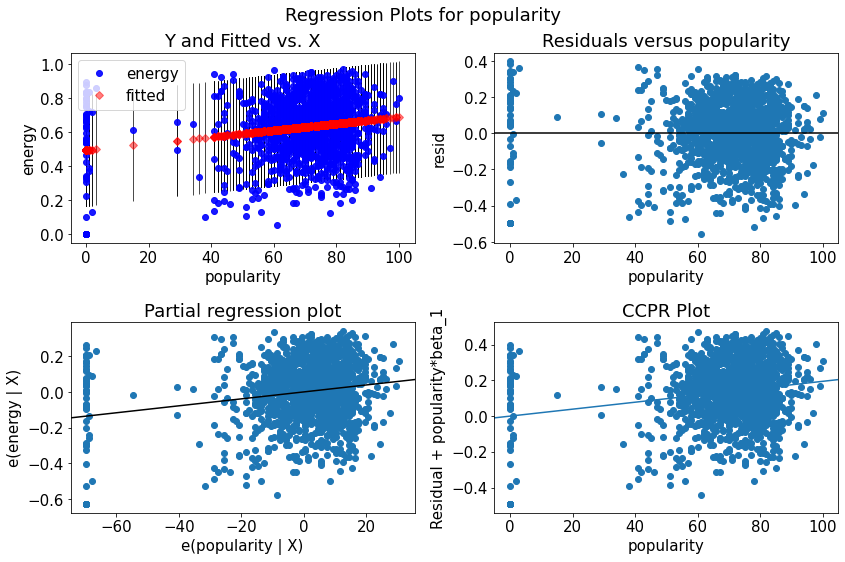

In [113]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model, 'popularity', fig=fig)

## Cross Validation model based on song sample

In [143]:
# Cross validation score
#try to predict popularity for test song sample based on energy,danceability,speechiness,valence,liveness,acousticness.
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score
X=filtered_data.loc[:,['streams','artist']].values
y=filtered_data.loc[:,'popularity'].values
regressor=LinearRegression()
mse=cross_val_score(regressor,X_train,y_train,scoring='neg_mean_squared_error',cv=5)      # neg_mean_squared_error
mse_mean=np.mean(mse)
print('Mean Squared Error: ',mse_mean)
diff=MSE-abs(mse_mean)
print('DIFF',diff)

Mean Squared Error:  -288.51293414352665
DIFF -40.52447522015456


In [144]:
X=filtered_data.loc[:,['energy','danceability','speechiness','valence','liveness','acousticness']].values
y=filtered_data.loc[:,'popularity'].values

In [145]:
X

array([[0.8   , 0.714 , 0.0504, 0.589 , 0.359 , 0.127 ],
       [0.764 , 0.591 , 0.0483, 0.478 , 0.103 , 0.0383],
       [0.664 , 0.563 , 0.154 , 0.688 , 0.0849, 0.335 ],
       ...,
       [0.523 , 0.765 , 0.03  , 0.394 , 0.132 , 0.184 ],
       [0.55  , 0.832 , 0.0587, 0.881 , 0.182 , 0.249 ],
       [0.603 , 0.448 , 0.064 , 0.422 , 0.0862, 0.433 ]])

In [146]:
y

array([100.,  99.,  99., ...,  81.,  60.,  70.])

In [147]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
print('X.shape, X_train.shape, X_test.shape')
print(X.shape,X_train.shape,X_test.shape)

X.shape, X_train.shape, X_test.shape
(1556, 6) (1244, 6) (312, 6)


In [148]:
# https://towardsdatascience.com/how-to-impliment-a-gaussian-naive-bayes-classifier-in-python-from-scratch-11e0b80faf5a
# https://www.programcreek.com/python/example/87301/sklearn.naive_bayes.GaussianNB
# https://www.datacamp.com/community/tutorials/naive-bayes-scikit-learn
# https://jakevdp.github.io/PythonDataScienceHandbook/05.12-gaussian-mixtures.html
from sklearn.naive_bayes import GaussianNB
gauss = GaussianNB()
gauss.fit(X_train, y_train)
y_pred_g = gauss.predict(X_test)
data_pred_g = pd.DataFrame({'actual':y_test, 'predicted':y_pred_g})
data_pred_g


,actual,predicted
0,79.0,61.0
1,73.0,73.0
2,65.0,2.0
3,60.0,70.0
4,59.0,73.0
...,...,...
307,63.0,73.0
308,64.0,91.0
309,87.0,95.0
310,80.0,2.0


# Gaussian Score of model

In [149]:
g_score = cross_val_score(gauss,X_train, y_train, scoring='accuracy', cv=3).mean()*100
print('Gaussian Score',g_score)

Gaussian Score 3.8587199037696682


# Plots of model

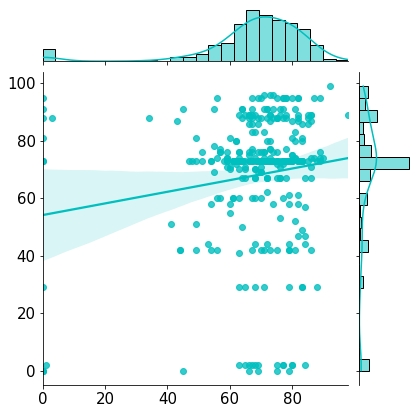

<Figure size 1440x720 with 0 Axes>

In [150]:
# https://medium.com/the-researchers-guide/generate-publication-ready-facet-pair-and-joint-plots-using-seaborn-library-part-2-4a2a6f2f491a
sns.jointplot(x=y_test, y=y_pred_g, kind='reg', color='c')
plt.show()
plt.clf()

# sns.set_style("whitegrid")
# g = sns.JointGrid(x=y_test,y=y_pred_g,data = 'reg')   #this code also works
# g.plot(sns.regplot, sns.histplot)
# plt.show()
# plt.clf()

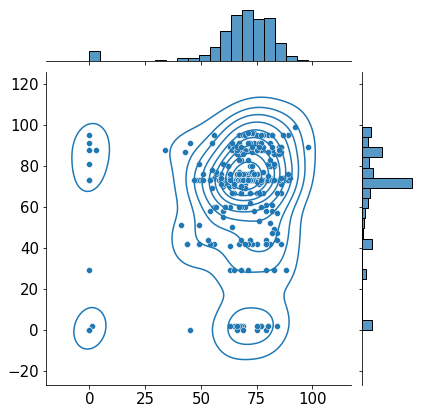

<Figure size 1440x720 with 0 Axes>

In [151]:
# https://medium.com/the-researchers-guide/generate-publication-ready-facet-pair-and-joint-plots-using-seaborn-library-part-2-4a2a6f2f491a
g = (sns.jointplot(x = y_test, y = y_pred_g, kind = 'scatter', data = 'reg', marginal_kws = {"bins": 20}).plot_joint(sns.kdeplot))
plt.show()
plt.clf()

# LinearSVC model

In [152]:
# https://docs.w3cub.com/scikit_learn/modules/generated/sklearn.datasets.load_iris.html
# https://www.programcreek.com/python/example/81062/sklearn.datasets.load_iris
from sklearn.datasets import load_iris
# https://pythonprogramming.net/linear-svc-example-scikit-learn-svm-python/
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html
from sklearn.svm import LinearSVC, SVC
Linear_SVC = LinearSVC(penalty='l2', loss='squared_hinge', dual=True)   #l2 penalty is default, squared_hings is default
Linear_SVC.fit(X_train, y_train)
y_pred_svc=gauss.predict(X_test)
data_pred_svc = pd.DataFrame({'actual': y_test, 'predicted': y_pred_svc})
data_pred_svc

,actual,predicted
0,79.0,61.0
1,73.0,73.0
2,65.0,2.0
3,60.0,70.0
4,59.0,73.0
...,...,...
307,63.0,73.0
308,64.0,91.0
309,87.0,95.0
310,80.0,2.0


# Plot

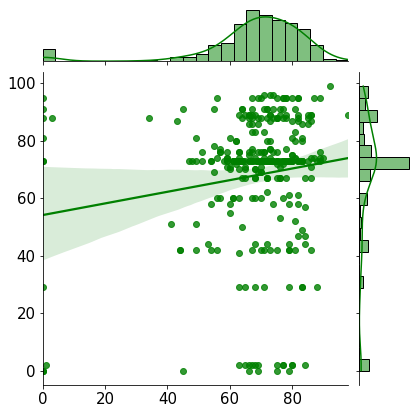

In [153]:
sns.jointplot(x=y_test, y=y_pred_svc, kind='reg', color='g')            #did not change

In [ ]:
g = (sns.jointplot(x = y_test, y = y_pred_svc, kind = 'scatter', data = 'reg', marginal_kws = {"bins": 20}).plot_joint(sns.kdeplot))            #did not change
plt.show()
plt.clf()

# extra

In [ ]:
# import pandas_profiling
# from pandas_profiling import ProfileReport
# profile = ProfileReport(tech_metric, title="Spotify Profiling Report", explorative=True)  #broken
# profile.to_widgets()